# KMENSAH_ASSIGNMENT3

# Home Credit Default Risk

Question 1

Clustering is often used to preprocess data in order to improve the predictive power of a machine learning model. Clustering is used for dimensionality reduction, feature-selection, and alternative representation. In this assignment you will apply the clustering algorithms to the credit-default data and examine whether any of the techniques can be used to learn about the patterns in the data and/or improve the predictive model. 

Create a PCA in Python and determine the top 10 principal components. Visualize the PCA. What does this tell you about the density of the data?


In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import LabelEncoder

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Import for feature standardization
from sklearn.decomposition import PCA # Import for PCA generation
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers


In [2]:
import matplotlib.gridspec as gridspec
import warnings
warnings.simplefilter('ignore', UserWarning)

import gc
gc.enable()

# Read the dataset

In [3]:
data1 = pd.read_csv("application_train.csv")

In [4]:
# copying data to another varaible to avoid any changes to original data
app_train3 = data1.copy()


In [5]:
app_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app_train3.shape

(307511, 122)

In [7]:
app_train3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
app_train3['TARGET'].isnull().values.any()

False

# Cleaning The Data

In [9]:
#Drop NAME_CONTRACT_TYPE, SK_ID_CURR

In [10]:
app_train1=app_train3.drop(['NAME_CONTRACT_TYPE', 'SK_ID_CURR'], axis=1)

In [11]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(15)
memory usage: 281.5+ MB


In [12]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Column names
#         Columns = pd.Series(df_train.columns)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1,ignore_index= True)
        
        # Rename the columns
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table

In [13]:
mis_val_table = missing_values_table(app_train1)
mis_val_table.tail(20)

The dataframe has 120 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5


# Split to Numerical and Categorical Features

In [14]:
def feature_type_split(data):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list.append(i)
        elif data[i].nunique() < 25:
            dis_num_list.append(i)
        #elif i in special_list:     # if you want to add some special cases
            #dis_num_list.append(i)
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list

cat_list, dis_num_list, num_list = feature_type_split(app_train1) 

In [15]:
df_c_numeric = app_train1[num_list]
df_categorical = app_train1[cat_list]
df_d_numeric = app_train1[dis_num_list]

print("num_list",len(num_list))
print("cat_list",len(cat_list))
print("dis_num_list",len(dis_num_list))

num_list 60
cat_list 15
dis_num_list 45


In [16]:
from sklearn.impute import SimpleImputer
import time

start = time.time()
#Categorical
app_train1[cat_list] = SimpleImputer(strategy='most_frequent').fit_transform(app_train1[cat_list])

#Discrete
app_train1[dis_num_list] = SimpleImputer(strategy='most_frequent').fit_transform(app_train1[dis_num_list])

end = time.time()
print('discrete imputing time:', str(round((end - start)/60)), 'mins')

# continuous 
start = time.time()
app_train1[num_list] = SimpleImputer(strategy='median').fit_transform(app_train1[num_list])
end = time.time()
print('continuous imputing time:', str(round((end - start)/60)), 'mins')

discrete imputing time: 0 mins
continuous imputing time: 0 mins


In [17]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(105), object(15)
memory usage: 281.5+ MB


In [18]:
app_train=app_train1

In [19]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [20]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 240)


In [21]:
app_train.head()

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Typ

# PCA

# Create Dataframe for PCA

In [22]:
apptrainpca=app_train

In [23]:
apptrainpca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 240 entries, TARGET to WALLSMATERIAL_MODE_Wooden
dtypes: float64(105), int32(3), uint8(132)
memory usage: 288.6 MB


In [24]:
#@title Designating target and features

y = apptrainpca.TARGET # Target variable
X = apptrainpca.drop(columns=['TARGET']) # Features by dropping the target column

In [25]:
#@title Standardizing the data

# Standardizing is needed as most clustering techniques depend on distance measures and hence differently scaled features can skew their importance
sc = StandardScaler() # Create scaler object
std_X = sc.fit_transform(X) # Apply to data. Note: an array is returned
X = pd.DataFrame(data=std_X, columns=X.columns) # Convert array back to DataFrame

In [26]:
#@title Plotting the Data

#sns.pairplot(X) # Plot each variable against all other variables
#plt.show()

# Principal Component Analysis

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components = 2)

In [28]:
pca.fit(X)

PCA(n_components=2)

In [30]:
x_pca = pca.transform(X)

print(x_pca.shape)

print(X.shape)

(307511, 2)
(307511, 239)


Text(0, 0.5, 'Second Principal Component')

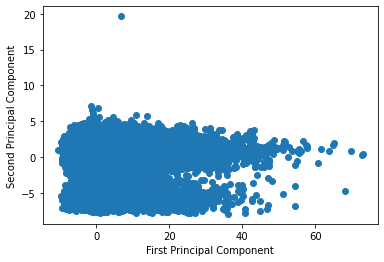

In [31]:
plt.scatter(x_pca[:,0],x_pca[:,1])

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

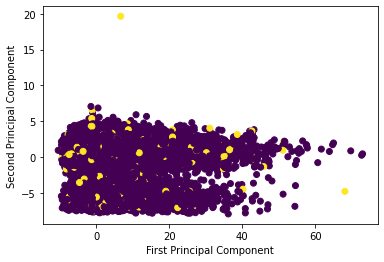

In [35]:
plt.scatter(x_pca[:,0],x_pca[:,1], c=app_train['TARGET'])

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

In [36]:
#@title Generating Principal Components

pca = PCA() # Create PCA object
pca_db_comp = pca.fit_transform(X) # Generate the Principle Components of data

In [37]:
# Building a dataframe from the Principal Components array

pca_db_cols = [] # Initialize an empty array to hold the column names
for i in range(0, len(pca_db_comp[0])): # Iterate through the number of columns in the array
  pca_db_cols.append("PC"+str(i)) # Build and append column names
pca_db_df = pd.DataFrame(data=pca_db_comp, columns=pca_db_cols)
pca_db_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,PC201,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213,PC214,PC215,PC216,PC217,PC218,PC219,PC220,PC221,PC222,PC223,PC224,PC225,PC226,PC227,PC228,PC229,PC230,PC231,PC232,PC233,PC234,PC235,PC236,PC237,PC238
0,-5.097847,0.902095,1.307918,1.726701,-2.087511,-2.560610,-0.004851,-0.497537,3.972565,2.296057,1.723584,1.934629,1.195184,1.815220,1.066100,0.746009,0.537781,0.356668,-0.052342,1.821320,-0.231923,-0.535461,-1.811392,0.458658,-1.421739,0.719364,-1.844071,-0.694523,-1.034100,-0.951188,-2.638794,-3.233944,0.854580,-1.411175,0.578670,0.184596,0.366567,1.403322,0.893626,0.755605,2.357036,0.795716,0.040093,-0.245770,0.625454,-0.796807,0.120500,-0.269278,-0.075476,-0.295304,0.247274,0.532432,0.642258,0.056109,-0.622553,0.014627,-0.001874,-0.177480,-0.200465,-0.100600,0.308748,-0.346251,-0.221045,0.226756,-0.182508,-0.269870,-0.254314,-0.318750,-0.512608,0.077890,0.473211,0.121492,-0.278298,-0.413024,-0.222047,-0.253396,-0.216229,0.127900,-0.005884,-0.042537,0.260854,0.037148,0.290324,-0.005413,0.414377,0.086862,-0.183987,0.134538,-0.244258,-0.024873,-0.240096,0.186359,0.363999,-0.182482,0.025920,0.090246,0.126594,-0.192413,-0.140140,0.021673,0.200699,-0.025165,-0.061698,-0.016086,0.014429,-0.069156,-0.275850,0.068520,-0.137185,0.054198,0.083085,-0.083283,0.039174,-0.206930,0.100988,0.136547,0.097999,-0.167507,0.242314,0.035800,0.060913,0.092568,0.039675,0.125384,0.376974,0.124778,-0.136387,0.285352,0.076389,-0.062210,-0.004991,0.172640,-0.125087,0.170367,0.155751,0.167481,0.190799,0.211029,-0.692859,-0.171206,-0.554311,-0.287912,0.872098,-0.262233,-0.046926,0.205605,0.476138,-0.472542,0.427435,-0.167341,0.197582,0.008644,0.841162,-0.573728,-0.529352,-0.640616,0.370542,-0.481042,0.049891,0.456654,0.409166,0.374110,0.932180,0.633564,0.434949,-0.537444,-0.024722,-0.011413,-0.427004,0.227111,0.024180,0.042279,-0.374151,0.198763,-0.115535,-0.197167,1.601507,0.595552,0.936271,0.002841,-0.794465,0.071302,0.116727,0.109575,-0.075567,-0.111564,0.053437,0.064273,-0.069178,-0.675538,-0.042996,0.048997,-0.009021,-0.056295,0.007576,0.015601,0.001247,-0.006837,-0.032010,-0.006238,-0.011922,-0.016290,-0.004754,-0.013028,0.013595,-0.013012,-0.009331,-0.002346,-0.013179,-0.000366,0.004837,0.005735,0.002155,0.003873,0.005392,-0.001359,0.000274,0.001014,-0.000014,0.001718,0.000197,0.002136,-0.000180,-0.000279,-0.000812,4.506103e-04,1.427298e-12,4.517585e-15,-1.650974e-14,-1.098473e-14,-9.040799e-15,-1.414800e-14,-9.915939e-15,-1.830151e-14,-3.988872e-15,1.178038e-14,-1.710628e-15,-1.257439e-15,-7.768182e-15
1,0.228060,1.538418,-5.322134,1.095911,0.170226,3.391176,-1.613535,0.280731,-1.138362,0.299128,-0.328224,1.065304,0.758860,-2.183607,-0.613912,-0.158604,1.502384,-0.873080,-3.722893,0.333443,0.557735,-0.921832,1.006277,-1.710698,-1.668270,1.435174,-1.363182,-0.196577,0.177852,-0.587822,-0.014184,-0.240381,-0.178865,-0.554679,0.691185,-0.575604,0.29

In [38]:
#@title Ploting the Principal Components

#sns.pairplot(pca_db_df)

Variance Explained by each component:
 [7.70417732e-02 2.93456953e-02 2.06591274e-02 1.61117940e-02
 1.40597108e-02 1.28764066e-02 1.27328437e-02 1.20807236e-02
 1.09196638e-02 1.06814787e-02 1.02224080e-02 9.77526571e-03
 9.25669754e-03 9.09620303e-03 8.50137840e-03 8.36608727e-03
 8.18323043e-03 8.05712163e-03 7.75019543e-03 7.53394912e-03
 7.40726695e-03 6.86016672e-03 6.59725170e-03 6.38166890e-03
 6.15915777e-03 6.08860648e-03 5.91545420e-03 5.84483811e-03
 5.77474029e-03 5.74518029e-03 5.66339411e-03 5.60534922e-03
 5.55397774e-03 5.48222732e-03 5.44084319e-03 5.38467934e-03
 5.33455016e-03 5.22435206e-03 5.16344712e-03 5.07883737e-03
 5.03875384e-03 5.02918856e-03 5.02058281e-03 4.98815575e-03
 4.93266635e-03 4.91733235e-03 4.86102558e-03 4.82909298e-03
 4.80524516e-03 4.78280297e-03 4.74262065e-03 4.71333262e-03
 4.70102287e-03 4.65087404e-03 4.61537372e-03 4.57524489e-03
 4.53317344e-03 4.52104024e-03 4.49374737e-03 4.48268972e-03
 4.46548978e-03 4.45705865e-03 4.43801504e-03 

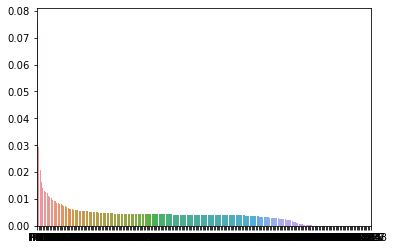

In [39]:
#@title Analyzing the variance of PCs

var_ratios = pca.explained_variance_ratio_ # Fetch variance ratios
print("Variance Explained by each component:\r\n", var_ratios) # Print variance ratios
sns.barplot(x=pca_db_cols, y=var_ratios) # Chart variance ratios
plt.show()

In [40]:
#Percentage of Variance Captured by all principal components
print("Variance Explained by all all principal components: ", \
sum(pca.explained_variance_ratio_))

Variance Explained by all all principal components:  1.0000000000000004


In [41]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

In [42]:
print('Variance Captured by First 10 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.21650922]


In [43]:
print('Variance Captured by First 20 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)

Variance Captured by First 20 Principal Components:  [0.30325175]


In [44]:
print('Variance Captured by First 50 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)

Variance Captured by First 50 Principal Components:  [0.46916259]


In [45]:
print('Variance Captured by First 100 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:239].sum(axis=1).values)

Variance Captured by First 100 Principal Components:  [0.68693187]
Variance Captured by First 200 Principal Components:  [0.9993691]
Variance Captured by First 300 Principal Components:  [1.]
